In [50]:
#check waveforms 

import obspy 

from obspy import read

from obspy import Stream

import copy


##STATIONS

15 Trace(s) in Stream:
HA.ATHR..HHZ | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HA.ATHR..HHE | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HA.ATHR..HHN | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HL.VLS..HHZ  | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HL.VLS..HHE  | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HL.VLS..HHN  | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HP.FSK..HHN  | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HP.FSK..HHE  | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HP.FSK..HHZ  | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples
HT.DMLN..HHN | 2024-08-25T17:55:29.609999Z - 2024-08-25T17:55:51.609999Z | 100.0 Hz, 2201 sampl

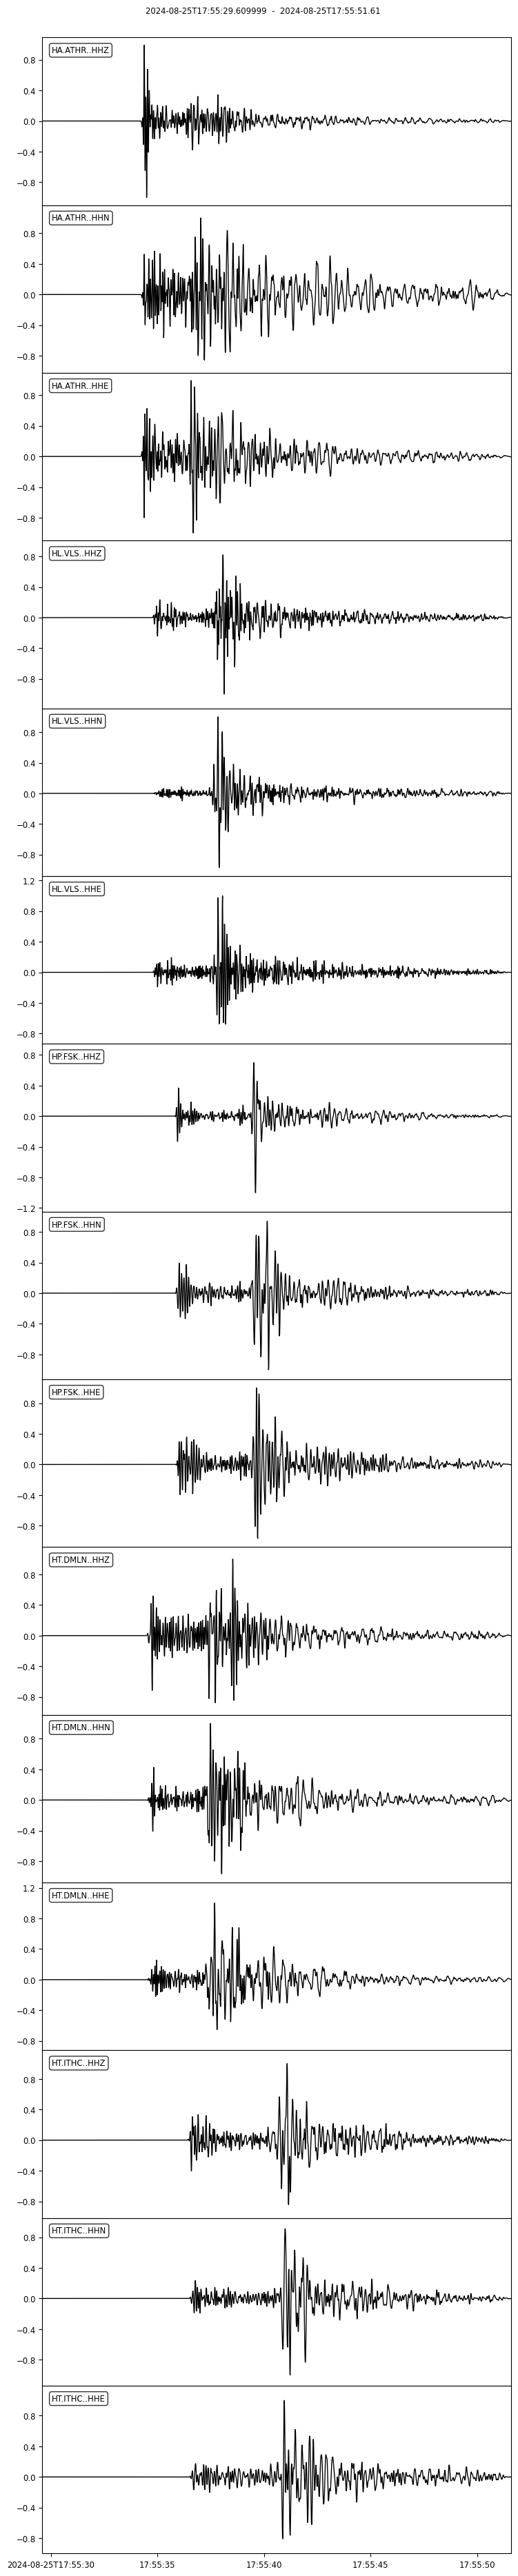

/home/emanuele/miniconda3/envs/loki-DAS-ema/lib/python3.7/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


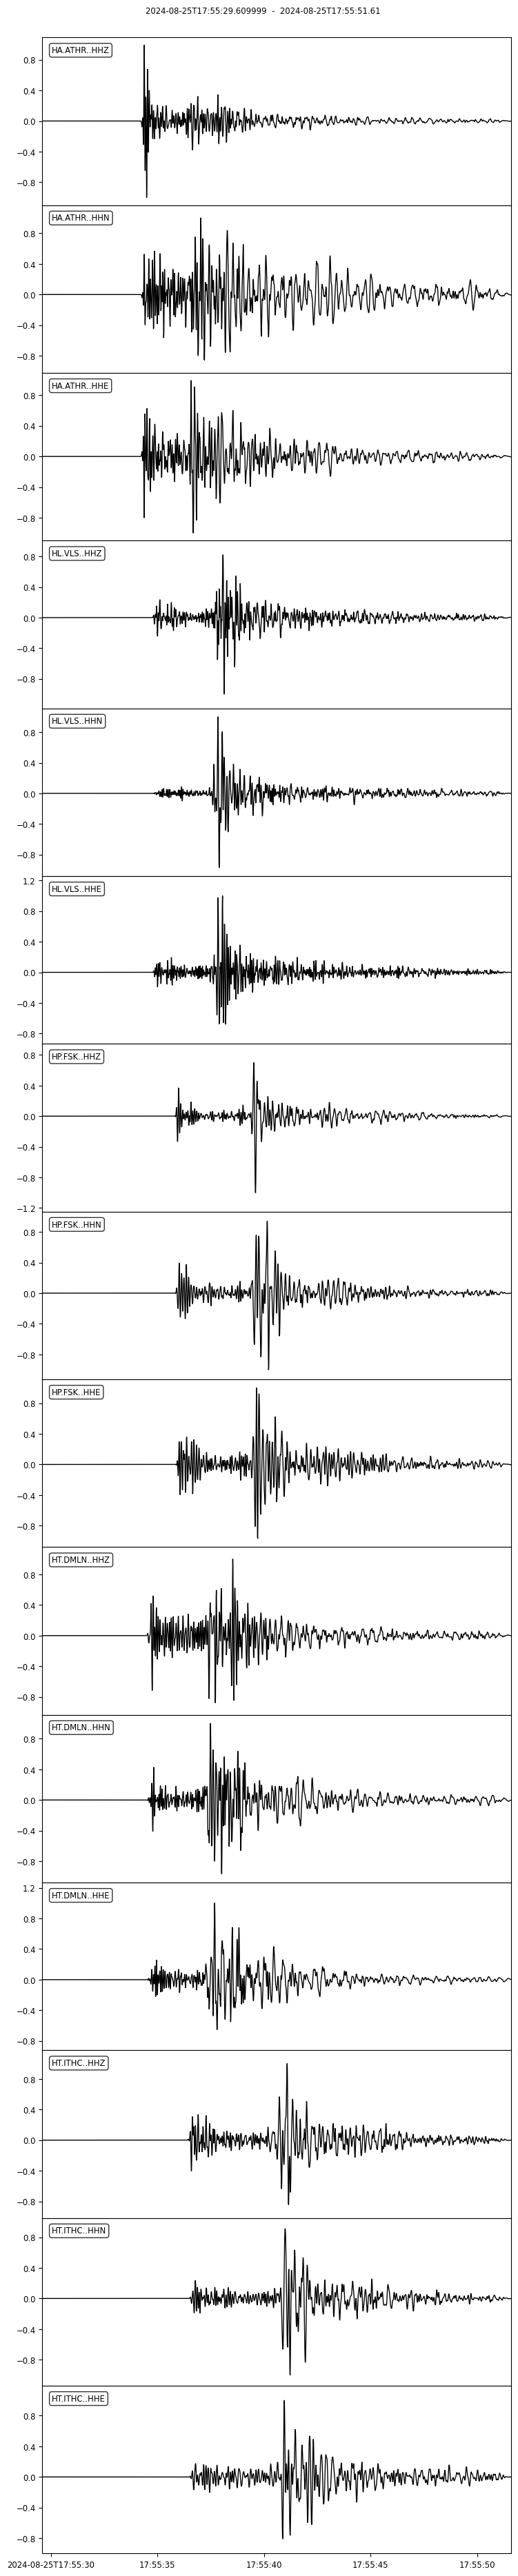

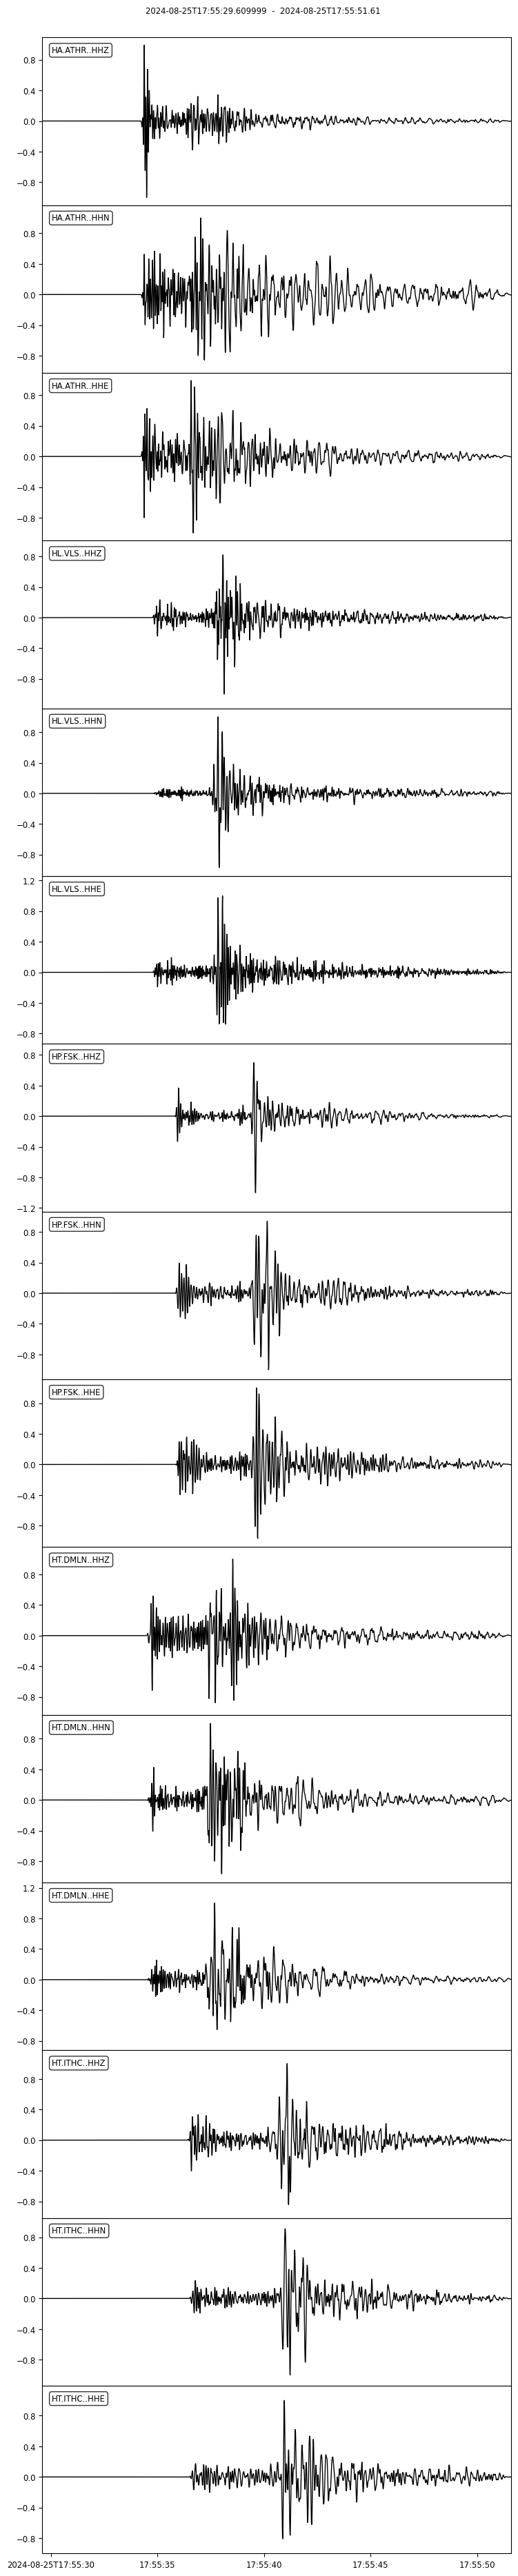

In [58]:
#path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024prefy.mseed'
#path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/prefy/stations/noa2024prefy_filt.mseed'
#path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024prefy_das.mseed'
#save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/prefy/fiber/noa2024prefy_das_sel.mseed'
#save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/prefy/hybrid/noa2024prefy_das_sel_subsampling.mseed'

#path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024qalpq.mseed'
#path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qalpq/stations/noa2024qalpq_filt.mseed'
#path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024qalpq_das.mseed'
#save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qalpq/fiber/noa2024qalpq_das_sel.mseed'
#save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qalpq/hybrid/noa2024qalpq_das_sel_subsampling.mseed'

#path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024pqvcv.mseed'
#path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/pqvcv/stations/noa2024pqvcv_filt.mseed'
#path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024pqvcv_das.mseed'
#save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/pqvcv/fiber/noa2024pqvcv_das_sel.mseed'
#save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/pqvcv/hybrid/noa2024pqvcv_das_sel_subsampling.mseed' 


#path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024rgjis.mseed'
#path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/rgjis/stations/noa2024rgjis_filt.mseed'
#path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024rgjis_das.mseed'
#save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/rgjis/fiber/noa2024rgjis_das_sel.mseed'
#save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/rgjis/hybrid/noa2024rgjis_das_sel_subsampling.mseed'

#path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024prlri.mseed'
#path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/prlri/stations/noa2024prlri_filt.mseed'
#path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/events/noa2024prlri_das.mseed'
#save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/prlri/fiber/noa2024prlri_das_sel.mseed'
#save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/prlri/hybrid/noa2024prlri_das_sel_subsampling.mseed'

#path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024qmbey.mseed'
#path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qmbey/stations/noa2024qmbey_filt.mseed'
#path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024qmbey_das.mseed'
#save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qmbey/fiber/noa2024qmbey_das_sel.mseed'
#save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qmbey/hybrid/noa2024qmbey_das_sel_subsampling.mseed'


path_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024qsmcp.mseed'
path_save_st = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qsmcp/stations/noa2024qsmcp_filt.mseed'
path =  '/home/emanuele/data/emanuele/loki-das/cefalonia/Waveforms_Emanuele/noa2024qsmcp_das.mseed'
save_path = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qsmcp/fiber/noa2024qsmcp_das_sel.mseed'
save_path_subsampling = '/home/emanuele/data/emanuele/loki-das/cefalonia/events/qsmcp/hybrid/noa2024qsmcp_das_sel_subsampling.mseed'
st = read(path_st)

print(st)

sta_filt = st.copy()

sta_filt = sta_filt.detrend("demean")  
sta_filt = sta_filt.taper(0.05, type='cosine')
sta_filt = sta_filt.filter("bandpass", freqmin=2.0, freqmax = 15)  
sta_filt.normalize()

stations_sf = sta_filt[0].stats.sampling_rate 

print(stations_sf)

# Plot normalized traces
sta_filt.plot()


sta_filt.write(path_save_st, format="MSEED")

sta_filt.plot()


##FIBER

In [59]:


st = read(path)

print(st)

selected_stations = ["0223", "0500", "0800", "1000", "1200", "1400", "1663", "1723", "2000", "2487", "3039", "4000", "5000", "6000", "7150", "7185"]  # Replace with your station IDs
#selected_stations = ["0223", "0500", "1200", "3039", "4000", "5000", "7150", "7185", "7350"]  # Replace with your station IDs
selected_stations_hybrid = ["0223",  "1200", "3039", "5000",  "7185"]  # Replace with your station IDs


filtered_stream = Stream()
subsampled_filtered_stream = Stream()

g = st.copy()

for a in selected_stations: 
    
    b = g.select(station=str(a))
    filtered_stream.append(b[0])

ch = ["HHE", "HHN", "HHZ"]

e = st.copy()

for a in selected_stations_hybrid: 
    
    b_new = e.select(station=str(a))
    c_new = b_new.resample(stations_sf)

    trace_N = copy.deepcopy(c_new[0]) 
    trace_E = copy.deepcopy(c_new[0]) 
    trace_N.stats.channel = "HHE"
    trace_E.stats.channel = "HHN"

    subsampled_filtered_stream.append(c_new[0])
    subsampled_filtered_stream += trace_N
    subsampled_filtered_stream += trace_E


filtered_stream.write(save_path, format="MSEED")

#sta_filt_only_z = sta_filt.copy()

#sta_filt_only_z = sta_filt_only_z.select(channel="*Z")



subsampled_filtered_stream_hydrid = subsampled_filtered_stream + sta_filt

print(subsampled_filtered_stream)


subsampled_filtered_stream_hydrid.write(save_path_subsampling, format="MSEED")





7750 Trace(s) in Stream:

OF.0001..HHZ | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.606000Z | 250.0 Hz, 5500 samples
...
(7748 other traces)
...
OF.7750..HHZ | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.606000Z | 250.0 Hz, 5500 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]
15 Trace(s) in Stream:
OF.0223..HHZ | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.600000Z | 100.0 Hz, 2200 samples
OF.0223..HHE | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.600000Z | 100.0 Hz, 2200 samples
OF.0223..HHN | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.600000Z | 100.0 Hz, 2200 samples
OF.1200..HHZ | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.600000Z | 100.0 Hz, 2200 samples
OF.1200..HHE | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.600000Z | 100.0 Hz, 2200 samples
OF.1200..HHN | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.600000Z | 100.0 Hz, 2200 samples
OF.3039..HHZ | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.600000Z 

/home/emanuele/miniconda3/envs/loki-DAS-ema/lib/python3.7/site-packages/obspy/io/mseed/core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
/home/emanuele/miniconda3/envs/loki-DAS-ema/lib/python3.7/site-packages/obspy/io/mseed/core.py:823: UserWarning: File will be written with more than one different record lengths.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'record lengths')


30 Trace(s) in Stream:

OF.0223..HHZ | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.600000Z | 100.0 Hz, 2200 samples
...
(28 other traces)
...
HT.ITHC..HHN | 2024-08-25T17:55:29.610000Z - 2024-08-25T17:55:51.610000Z | 100.0 Hz, 2201 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


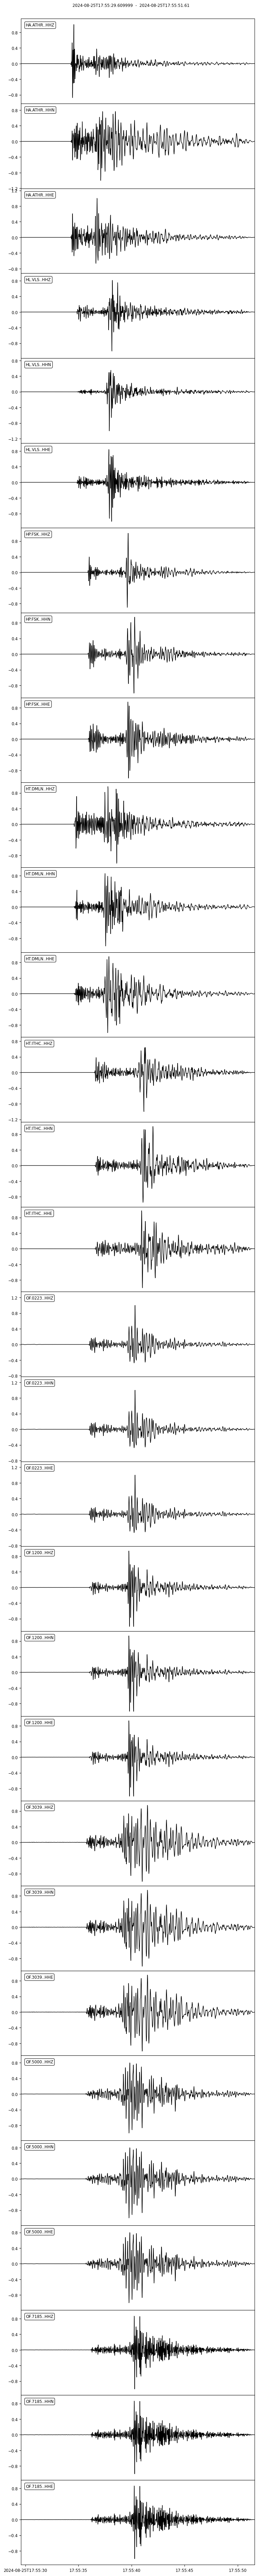

/home/emanuele/miniconda3/envs/loki-DAS-ema/lib/python3.7/site-packages/obspy/io/mseed/core.py:823: UserWarning: File will be written with more than one different record lengths.
This might have a negative influence on the compatibility with other programs.
  warnings.warn(msg % 'record lengths')


In [60]:
das = read(save_path_subsampling)

print(das)

das_filt = das.copy()

das = das.detrend("demean")  
das = das.taper(0.05, type='cosine')
das_filt = das.filter("bandpass", freqmin=2, freqmax = 15)  
das_filt.normalize()

# Plot normalized traces
das_filt.plot()

das_filt.write(save_path_subsampling, format="MSEED")